In [1]:
## import libaries
import pandas as pd
import numpy as np
import cv2
import os, sys
from tqdm import tqdm

In [2]:


from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from seansUtils.research import StatsCallback, ModelSummary
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)



Using TensorFlow backend.


In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import helper

In [6]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [7]:
train.detected=train.detected.apply(lambda x:x[6:])

In [8]:
train.detected=train.detected.astype('int64')

In [9]:
# Hyper Parameters
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 100

In [9]:
arr=np.unique(train.detected.values)

df=pd.DataFrame(data=None, columns=train.columns)

for i in arr:
    df=df.append(train.loc[train.detected==i].sample(60))

In [10]:
df = shuffle(df)
y=df.detected
df.drop(['detected'],axis=1,inplace=True)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

In [73]:
#x=y_train.cat.codes.map( dict( enumerate(y_train.cat.categories) ) ).astype('category')
y_train=y_train.astype('category').cat.codes
y_test=y_test.astype('category').cat.codes

In [13]:
y_train = np_utils.to_categorical(y_train, 14)
y_test = np_utils.to_categorical(y_test, 14)

In [14]:
num_class=y_train.shape[1]

In [16]:
def read_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (32,32))
    return img

In [15]:
TRAIN_PATH = 'train_/'
TEST_PATH = 'test_/'

In [17]:
# load data
train_img, test_img = [],[]
for img_path in tqdm(X_train['image_name'].values):
    train_img.append(read_img(TRAIN_PATH + img_path))

for img_path in tqdm(X_test['image_name'].values):
    test_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 252/252 [00:06<00:00, 36.20it/s]


In [18]:
x_train = np.array(train_img, np.float32) / 255.
x_test=np.array(test_img, np.float32) / 255.

In [62]:
if TRAIN==False:
    model2=Sequential()
    model2.add(Convolution2D(128,3,3 ,input_shape=(32, 32, 3),border_mode='same'))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[2,2]))
    model2.add(Convolution2D(256,3,3))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[2,2]))
    #8x8x256
    model2.add(Convolution2D(512,3,3))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[4,4]))
    model2.add(Flatten())
    ##4x4x512
    model2.add(Dense(14))
    model2.add(Activation('softmax'))
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    stats = StatsCallback('basic_cnn')
    callback_list = [stats, early_stopping]
        # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    stats = stats.stats_dict
    pickle.dump(stats, open('./load/basic_cnn_stats.p', 'wb'))
    model2.save('./load/basic_cnn.h5')

Train on 588 samples, validate on 252 samples
Epoch 1/100
588/588 [==============================] - 12s - loss: 2.6962 - acc: 0.0544 - val_loss: 2.6436 - val_acc: 0.0595

In [ ]:
if TRAIN==False:
    model2 = Sequential()
    model2.add(Convolution2D(16, 3,1, input_shape=(32, 32, 3)))
    model2.add(Activation('relu'))
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(14))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    stats = StatsCallback('basic_cnn')
    callback_list = [stats, early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

In [ ]:
if TRAIN==False:
    # Deine model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D( 32, 2,2, input_shape=(28, 28, 3)))
    model2.add(Activation('relu'))
    
    model2.add(Convolution2D( 4, 2,2, input_shape=(28, 28, 3)))
    model2.add(Activation('relu'))

   
    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(14))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    stats = StatsCallback('basic_cnn')
    callback_list = [stats, early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    
    # Save model2 and Stats
    stats = stats.stats_dict
    pickle.dump(stats, open('./load/basic_cnn_stats.p', 'wb'))
    model2.save('./load/basic_cnn.h5')

else:
    print('Loading pretrained model...')
    stats = pickle.load(open('./load/basic_cnn_stats.p', 'rb'))
    model2 = keras.models.load_model('./load/basic_cnn.h5')
    print('Model Loaded.')

basic_cnn 
--------------------------

MODEL STATS 
------------
Accuracy:       0.170634921108
Loss:           2.62962858639
Parameters:     1486094
Training Time:  0:07:12.710523
Epoch Time:     0:00:12.272268


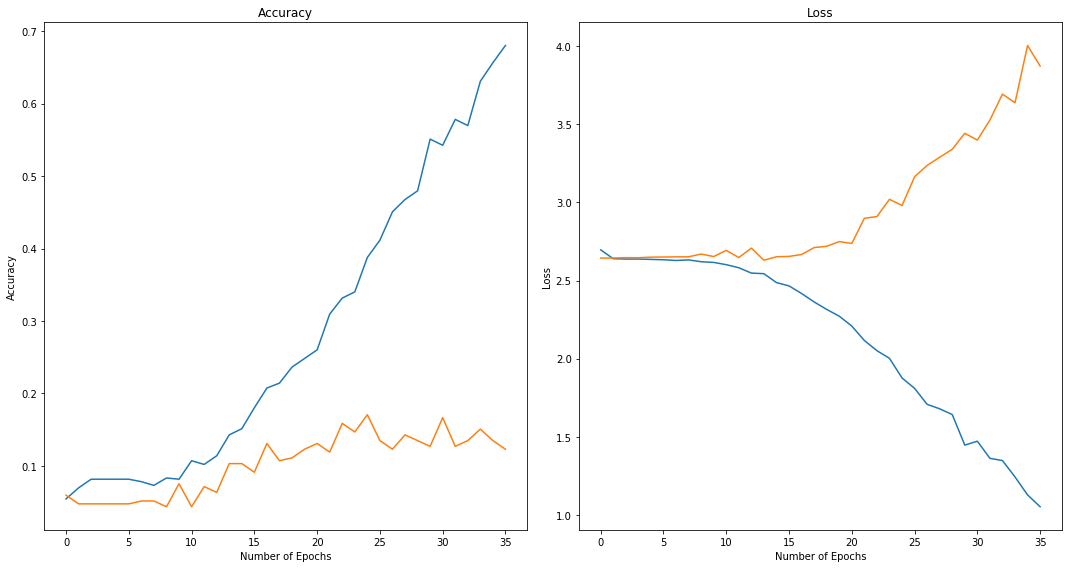

In [63]:
ModelSummary(model2, stats).show()

In [ ]:
print('Loading pretrained model...')
stats = pickle.load(open('./load/basic_cnn_stats.p', 'rb'))
model2 = keras.models.load_model('./load/basic_cnn.h5')
print('Model Loaded.')

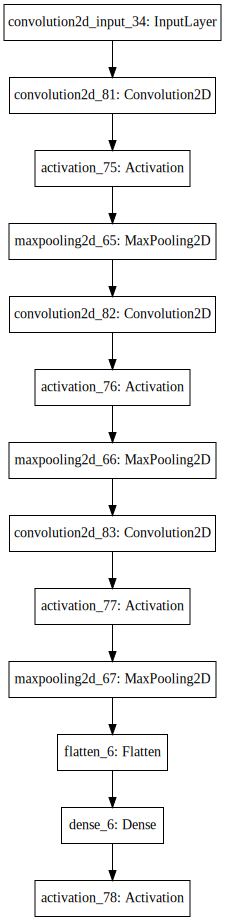

In [70]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [64]:
y_hat = model2.predict_classes(x_test)


252/252 [==============================] - 1s     


In [74]:
y_test

2450      2
15495     9
14668     7
4478      3
13216     2
9453      6
787       2
10287    10
5629      4
4227      1
5143     12
13733     3
4677      7
1968      0
2903     12
12307     9
16594     5
6731      7
3040     10
7315      3
882       6
1567      7
4776     12
13324     6
2530     10
4424      8
5121     12
7510     11
4932      1
7867      2
         ..
1887     13
1514      6
2902     10
13471     2
18183    13
4363      6
4898      8
12153     7
3898      8
13191     7
11268    11
16532     9
9469     10
17665    12
13791     4
8733     10
11694    13
5007     10
14065     4
13586     1
3653      8
10017    12
6704     10
18137     5
17753     4
10567    11
16194    13
1410      2
13853    13
5640      7
dtype: int8

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_hat,y_test)

0.12301587301587301